In [1]:
# Importing necessary libraries will be here

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os

project_root = os.path.abspath("..")
sys.path.append(project_root)

In [2]:
# we will identify our dataframe here and read the csv 
stock = pd.read_csv('../data/01_raw/stocks.csv')

print(stock.head())

             timestamp         name    last    high     low  chg_   chg_%  \
0  2025-11-12 20:30:02    Coca-Cola   71.71   71.89   71.34  0.10  +0.13%   
1  2025-11-12 20:30:02           3M  171.48  171.60  168.65  2.81  +1.67%   
2  2025-11-12 20:30:02  Walt Disney  116.35  116.42  114.53  1.50  +1.31%   
3  2025-11-12 20:30:02   Amazon.com  245.14  250.37  243.93 -3.96  -1.59%   
4  2025-11-12 20:30:02    Microsoft  501.35  509.25  499.12 -7.33  -1.44%   

      vol_      time  
0    4.78M  12:28:51  
1  864.41K  12:27:53  
2    5.19M  12:28:17  
3   14.07M  12:28:54  
4    8.81M  12:28:11  


In [3]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218398 entries, 0 to 218397
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  218398 non-null  object 
 1   name       218398 non-null  object 
 2   last       218398 non-null  float64
 3   high       218398 non-null  float64
 4   low        218398 non-null  float64
 5   chg_       218398 non-null  float64
 6   chg_%      218398 non-null  object 
 7   vol_       218398 non-null  object 
 8   time       218398 non-null  object 
dtypes: float64(4), object(5)
memory usage: 15.0+ MB


In [4]:
cleaned_df = pd.read_csv("../data/02_processed/stocks_clean.csv")

In [5]:
print(cleaned_df.tail())

                  timestamp       name    last    high     low  chg_   chg_%  \
218393  2025-11-12 20:30:02   JPMorgan  321.27  322.25  316.21  5.65  0.0179   
218394  2025-11-12 20:30:02      Cisco   73.13   73.27   71.72  1.42  0.0198   
218395  2025-11-12 20:30:02  Citigroup  102.85  103.86  101.18  2.09  0.0207   
218396  2025-11-12 20:30:02      Apple  274.36  275.24  271.87 -0.89 -0.0032   
218397  2025-11-12 20:30:02  Coca-Cola   71.71   71.89   71.34  0.10  0.0013   

                vol_  
218393  3.560000e+08  
218394  1.542000e+09  
218395  6.910000e+08  
218396  2.079000e+09  
218397  4.780000e+08  


In [6]:
# Okay now let's test our timestamp features function
import pandas as pd
from src.features import add_time_features

cleaned_df = add_time_features(cleaned_df)

cleaned_df[["timestamp","hour","weekday","month","is_weekend"]].tail()

,timestamp,hour,weekday,month,is_weekend
218393,2025-11-12 20:30:02,20,2,11,0
218394,2025-11-12 20:30:02,20,2,11,0
218395,2025-11-12 20:30:02,20,2,11,0
218396,2025-11-12 20:30:02,20,2,11,0
218397,2025-11-12 20:30:02,20,2,11,0


In [7]:
# Testing price features function
import pandas as pd
from src.features import add_price_features

cleaned_df = add_price_features(cleaned_df)

cleaned_df[["timestamp","name","last","high_low_range","last_lag_1","return_1h","ma_last_3h","volatility_3h"]].tail(20)

,timestamp,name,last,high_low_range,last_lag_1,return_1h,ma_last_3h,volatility_3h
217803,2025-11-12 10:59:59,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
217839,2025-11-12 11:30:01,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
217874,2025-11-12 12:00:03,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
217892,2025-11-12 12:30:02,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
217936,2025-11-12 13:00:03,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
217974,2025-11-12 13:30:02,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
217991,2025-11-12 14:00:03,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
218024,2025-11-12 14:30:02,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
218050,2025-11-12 15:00:01,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000
218096,2025-11-12 15:30:03,Walt Disney,114.85,2.55,114.85,0.000000,114.850000,0.000000


In [8]:
# Let's test the add_volume_features now
from src.features import add_volume_features

cleaned_df = add_volume_features(cleaned_df)

df_stock = cleaned_df[cleaned_df["name"] == "Walt Disney"].sort_values("timestamp")

df_stock[[
    "timestamp", "vol_",
    "vol_lag_1", "vol_change_1h",
    "vol_ma_3h", "vol_ma_6h"
]].head(15)

,timestamp,vol_,vol_lag_1,vol_change_1h,vol_ma_3h,vol_ma_6h
18,2025-03-17 00:45:59,102000000.0,NaN,NaN,102000000.0,102000000.0
36,2025-03-17 01:46:00,102000000.0,102000000.0,0.0,102000000.0,102000000.0
69,2025-03-17 02:46:01,102000000.0,102000000.0,0.0,102000000.0,102000000.0
98,2025-03-17 03:45:59,102000000.0,102000000.0,0.0,102000000.0,102000000.0
126,2025-03-17 04:46:00,102000000.0,102000000.0,0.0,102000000.0,102000000.0
151,2025-03-17 05:46:01,102000000.0,102000000.0,0.0,102000000.0,102000000.0
203,2025-03-17 06:46:00,102000000.0,102000000.0,0.0,102000000.0,102000000.0
210,2025-03-17 07:46:00,102000000.0,102000000.0,0.0,102000000.0,102000000.0
253,2025-03-17 08:46:00,102000000.0,102000000.0,0.0,102000000.0,102000000.0
295,2025-03-17 09:46:00,102000000.0,102000000.0,0.0,102000000.0,102000000.0


In [9]:
from src.features import build_features_dataset

df_with_features = build_features_dataset(cleaned_df)

print(df_with_features[[
    "timestamp", "name", "last", "vol_", 
    "vol_lag_1", "vol_change_1h", 
    "vol_ma_3h", "vol_ma_6h", 
    "return_1h", "high_low_range"
]].head(20))

              timestamp name    last         vol_    vol_lag_1  vol_change_1h  \
31  2025-03-17 01:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
74  2025-03-17 02:46:01   3M  150.41  409000000.0  409000000.0       0.000000   
117 2025-03-17 03:45:59   3M  150.41  409000000.0  409000000.0       0.000000   
141 2025-03-17 04:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
150 2025-03-17 05:46:01   3M  150.41  409000000.0  409000000.0       0.000000   
185 2025-03-17 06:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
227 2025-03-17 07:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
265 2025-03-17 08:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
298 2025-03-17 09:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
314 2025-03-17 10:45:59   3M  150.41  409000000.0  409000000.0       0.000000   
346 2025-03-17 11:46:00   3M  150.41  409000000.0  409000000.0       0.000000   
387 2025-03-17 12:46:00   3M

In [10]:
import pandas as pd

df = pd.read_csv("../data/02_processed/stocks_features.csv")

# show me the binary class counts baby
print("Class counts:")
print(df["movement_1h"].value_counts())

# I mean we can't really know until we check the distribution
print("\nClass distribution:")
print(df["movement_1h"].value_counts(normalize=True))

# This is a summary statistics of the returns
print("\nFuture return stats:")
print(df["future_return_1h"].describe())

Class counts:
movement_1h
0    193101
1     25235
Name: count, dtype: int64

Class distribution:
movement_1h
0    0.884421
1    0.115579
Name: proportion, dtype: float64

Future return stats:
count    218336.000000
mean          0.000021
std           0.002971
min          -0.185059
25%           0.000000
50%           0.000000
75%           0.000000
max           0.162296
Name: future_return_1h, dtype: float64


In [12]:
import pandas as pd

df = pd.read_csv("../data/02_processed/stocks_features.csv")

for th in [0.0002, 0.0005, 0.001, 0.002]:
    proportion = (df["future_return_1h"] > th).mean()
    print(f"Threshold {th}: {proportion:.4f}")


Threshold 0.0002: 0.1083
Threshold 0.0005: 0.0970
Threshold 0.001: 0.0815
Threshold 0.002: 0.0567


In [13]:
import pandas as pd

df = pd.read_csv("../data/02_processed/stocks_features.csv")

print("Up samples:", df[df["movement_1h"] == 1].head())
print("Down/Flat samples:", df[df["movement_1h"] == 0].head())


Up samples:               timestamp name    last    high     low  chg_   chg_%  \
14  2025-03-17 15:46:00   3M  150.41  150.79  147.06  4.31  0.0295   
15  2025-03-17 16:46:00   3M  151.99  152.34  150.00  1.58  0.0105   
18  2025-03-17 19:46:00   3M  152.89  153.61  150.00  2.48  0.0165   
19  2025-03-17 20:46:00   3M  153.63  153.63  150.00  3.22  0.0214   
41  2025-03-18 18:46:01   3M  151.10  153.21  150.68 -2.11 -0.0138   

           vol_  hour  weekday  ...  volatility_3h  ma_last_6h  volatility_6h  \
14  409000000.0    15        0  ...       0.000000  150.410000       0.000000   
15    2456000.0    16        0  ...       0.744819  150.673333       0.588831   
18  161000000.0    19        0  ...       0.140079  152.005000       1.195209   
19  192000000.0    20        0  ...       0.311377  152.541667       1.075460   
41   86292000.0    18        1  ...       0.783964  152.490000       0.908680   

      vol_lag_1  vol_change_1h     vol_ma_3h     vol_ma_6h  future_last_1h  \
14

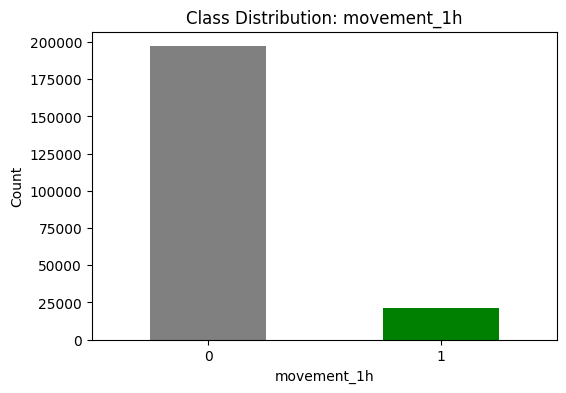

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/02_processed/stocks_features.csv")

counts = df["movement_1h"].value_counts()

plt.figure(figsize=(6,4))
counts.plot(kind="bar", color=["grey","green"])
plt.title("Class Distribution: movement_1h")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()


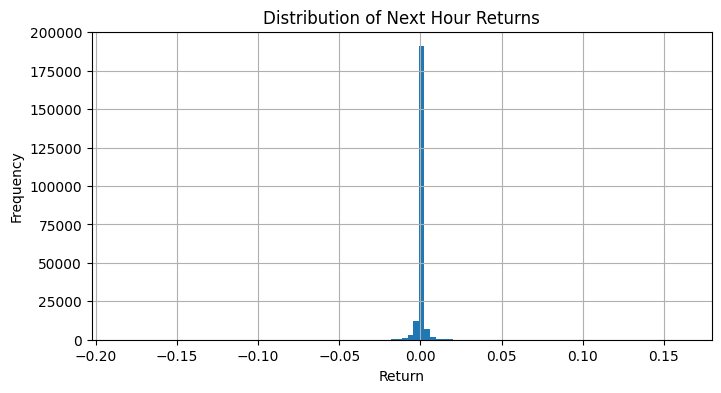

In [15]:
plt.figure(figsize=(8,4))
df["future_return_1h"].hist(bins=100)
plt.title("Distribution of Next Hour Returns")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.show()


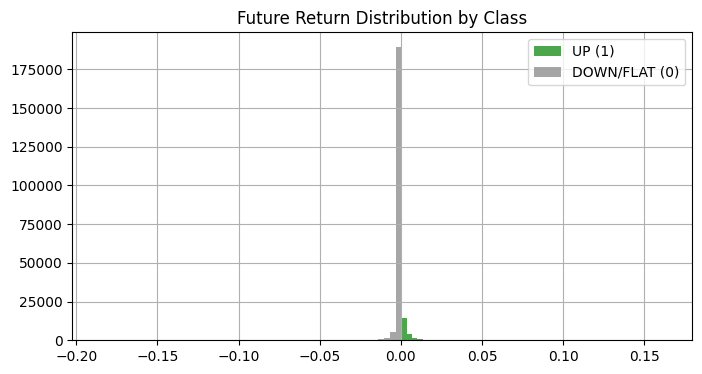

In [16]:
plt.figure(figsize=(8,4))
df[df["movement_1h"]==1]["future_return_1h"].hist(
    bins=50, color="green", alpha=0.7, label="UP (1)"
)
df[df["movement_1h"]==0]["future_return_1h"].hist(
    bins=50, color="grey", alpha=0.7, label="DOWN/FLAT (0)"
)
plt.legend()
plt.title("Future Return Distribution by Class")
plt.show()


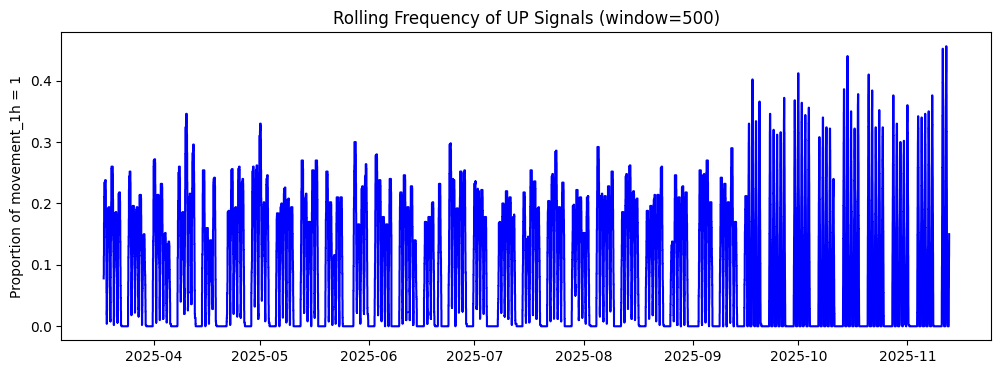

In [17]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

rolling_mean = df["movement_1h"].rolling(500).mean()

plt.figure(figsize=(12,4))
plt.plot(df["timestamp"], rolling_mean, color="blue")
plt.title("Rolling Frequency of UP Signals (window=500)")
plt.ylabel("Proportion of movement_1h = 1")
plt.show()


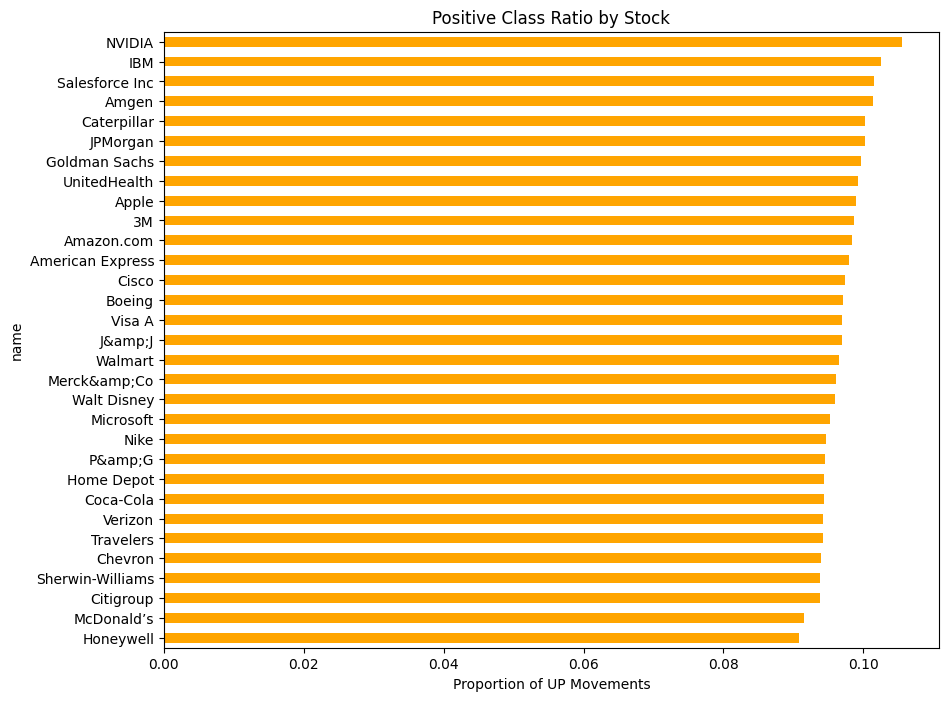

In [18]:
stock_ratios = (
    df.groupby("name")["movement_1h"]
    .mean()
    .sort_values()
)

plt.figure(figsize=(10,8))
stock_ratios.plot(kind="barh", color="orange")
plt.title("Positive Class Ratio by Stock")
plt.xlabel("Proportion of UP Movements")
plt.show()


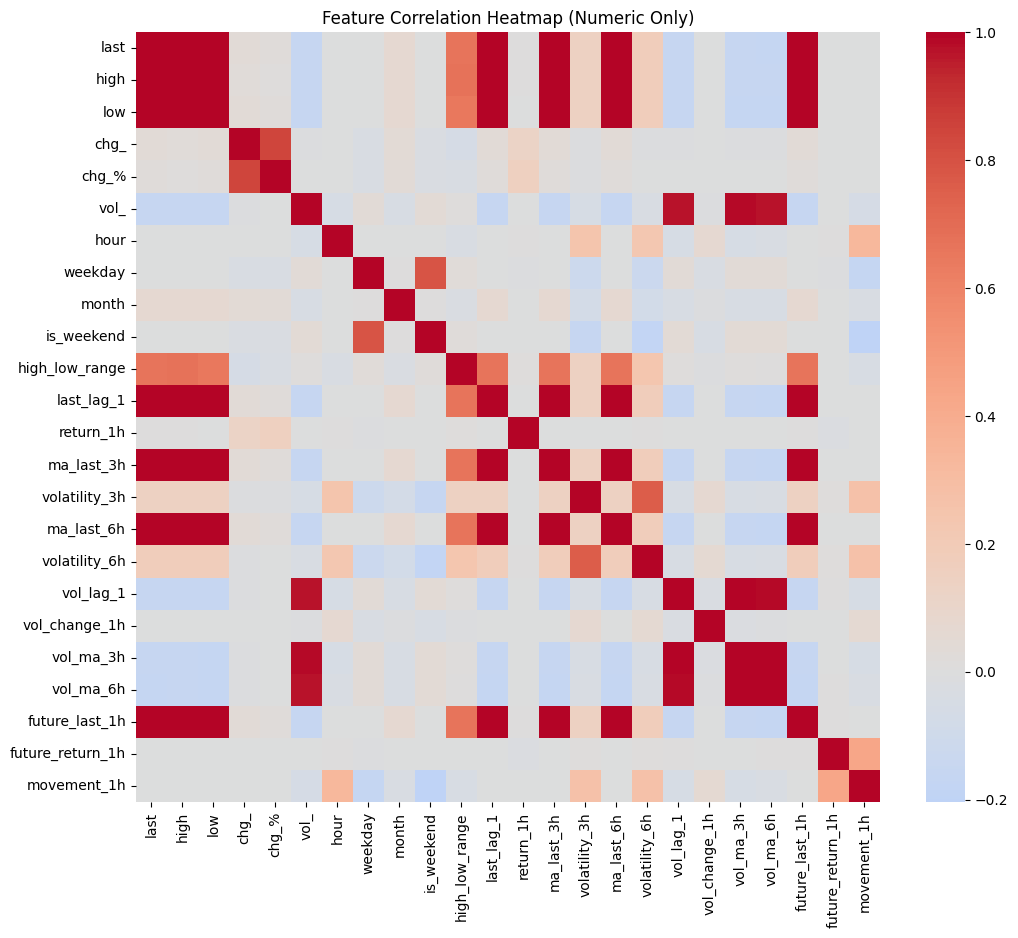

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=["number"])

plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap (Numeric Only)")
plt.show()

In [22]:
import pandas as pd

df = pd.read_csv("../data/02_processed/stocks_features.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

# Sort by time (critical!)
df = df.sort_values("timestamp")

# Split index
split_idx = int(len(df) * 0.80)

train_df = df.iloc[:split_idx]
test_df = df.iloc[split_idx:]

print("Train size:", len(train_df))
print("Test size:", len(test_df))


Train size: 174668
Test size: 43668


In [23]:
feature_cols = [
    col for col in df.columns
    if col not in [
        "timestamp", "name",
        "future_last_1h", "future_return_1h",
        "movement_1h"  # target
    ]
]

X_train = train_df[feature_cols]
y_train = train_df["movement_1h"]

X_test = test_df[feature_cols]
y_test = test_df["movement_1h"]


In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced", max_iter=500)

model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.8872629843363561
Precision: 0.3652196516766311
Recall: 0.3615542974781266
F1 Score: 0.3633777317987844


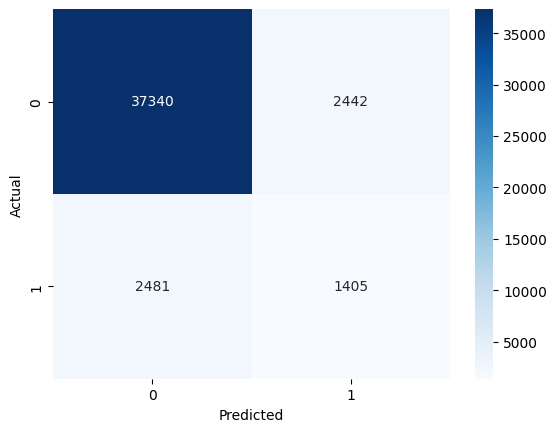

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
